In [12]:
import rasterio
from pathlib import Path
from rasterio.crs import CRS
from rasterio.merge import merge
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
slc_id = 'S1B_IW_SLC__1SDV_20211212T002818_20211212T002836_029985_03946A_6D2A'

In [3]:
out_dir = Path("out") / slc_id
out_dir.exists()

True

In [4]:
wtr_prod_paths = list((out_dir / 'sas' ).glob('*_WTR.tif'))
len(wtr_prod_paths), wtr_prod_paths[:2]

(12,
 [PosixPath('out/S1B_IW_SLC__1SDV_20211212T002818_20211212T002836_029985_03946A_6D2A/sas/OPERA_L3_DSWx-S1_T14SNG_20211212T002820Z_20231018T115050Z_S1B_30_vNone_B02_WTR.tif'),
  PosixPath('out/S1B_IW_SLC__1SDV_20211212T002818_20211212T002836_029985_03946A_6D2A/sas/OPERA_L3_DSWx-S1_T14SMF_20211212T002820Z_20231018T115050Z_S1B_30_vNone_B02_WTR.tif')])

In [5]:
def get_crs(wtr_path: Path):
    with rasterio.open(wtr_path) as ds:
        crs = ds.crs
    return crs

crs_wtrs = list(map(get_crs, wtr_prod_paths))
crs_wtrs

[CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32614),
 CRS.from_epsg(32615),
 CRS.from_epsg(32615),
 CRS.from_epsg(32614)]

In [6]:
with rasterio.open(wtr_prod_paths[0]) as ds:
    colormap = ds.colormap(1)

In [7]:
# Source: https://stackoverflow.com/a/1518632
def most_common_item(lst):
    return max(set(lst), key=lst.count)
prevalent_crs = most_common_item(crs_wtrs)

In [8]:
wtr_prod_paths_f = [p for p in wtr_prod_paths if get_crs(p) == prevalent_crs] 
len(wtr_prod_paths_f)

10

In [9]:
X, trans = merge(wtr_prod_paths_f)

In [10]:
cmap = ListedColormap([np.array(colormap[key]) / 255 for key in range(256)])

<Axes: >

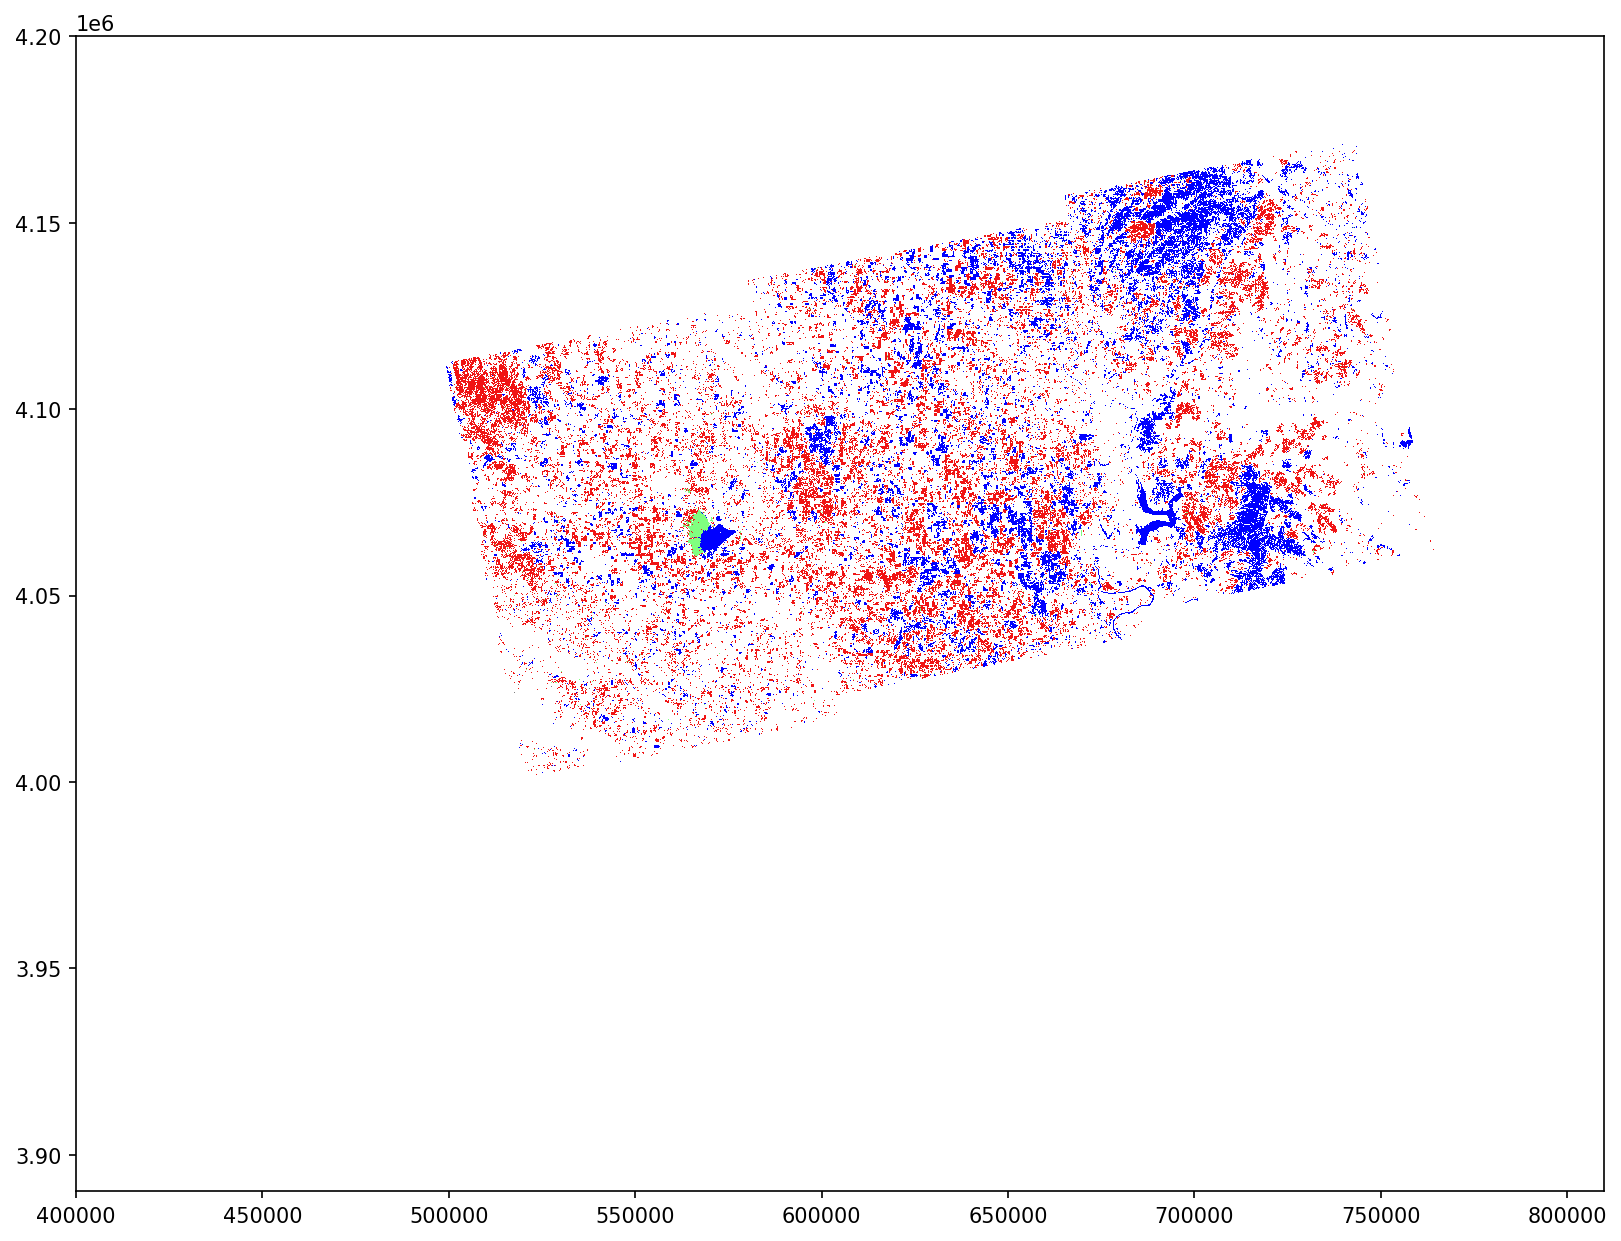

In [17]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=150)
show(X, transform=trans, cmap=cmap, vmin=0, vmax=255, interpolation='none', ax=ax)
